# Libraries

In [1]:
import pickle
import pandas as pd
import seaborn as sns
from os.path import exists
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Loading the Files

Download the csv files into the `data/` directory.

Loading datasets...
train.csv shape is  (1697533, 9)
test.csv shape is  (212192, 2)

Training Set Head:
        Id   ProductId          UserId  HelpfulnessNumerator  \
0   914403  B0009W5KHM   AV6QDP8Q0ONK4                   2.0   
1   354887  6303079709  A2I8RXJN80A2D2                   0.0   
2  1407653  B004H0M2XC  A3FHV3RV8Z12E6                   0.0   
3  1377458  B003ZJ9536  A12VLTA3ZHVPUY                   1.0   
4   475323  630574453X  A13NM1PES9OXVN                   2.0   

   HelpfulnessDenominator        Time  \
0                     2.0  1341014400   
1                     0.0  1168819200   
2                     0.0  1386201600   
3                     1.0  1348704000   
4                     3.0   970012800   

                                         Summary  \
0                                  GOOD FUN FILM   
1                                   Movie Review   
2             When is it a good time to Consent?   
3                                          TRUTH   
4  I

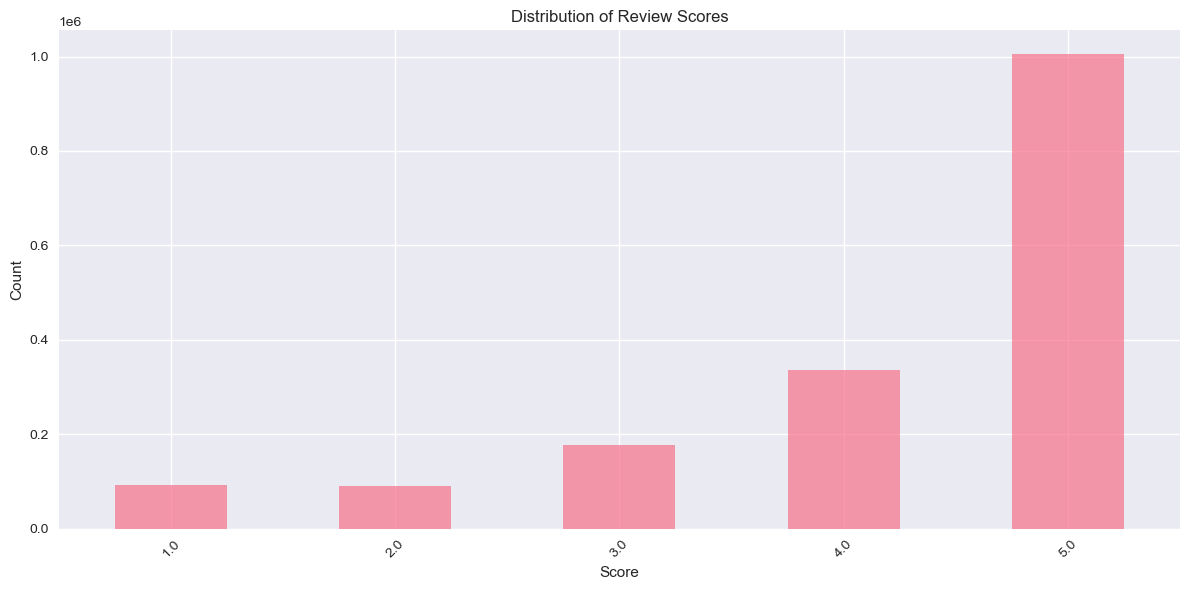


Analyzing Product and User Ratings...


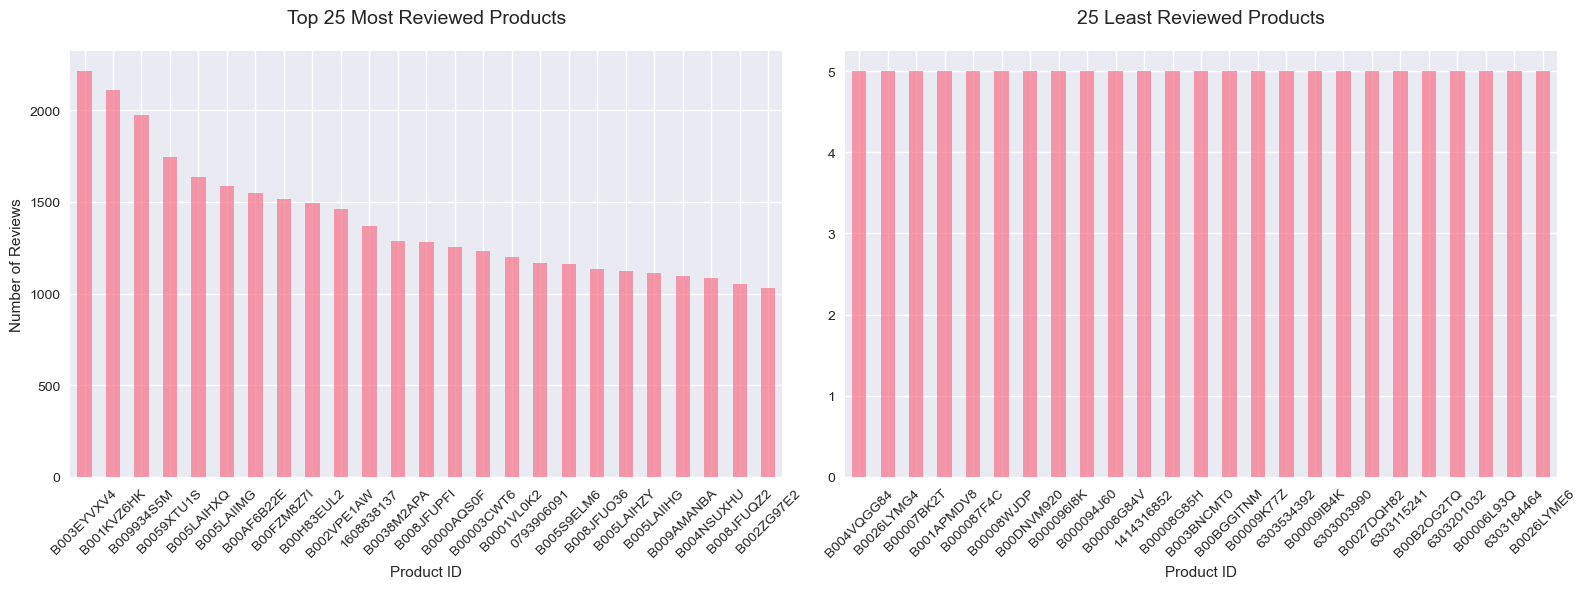

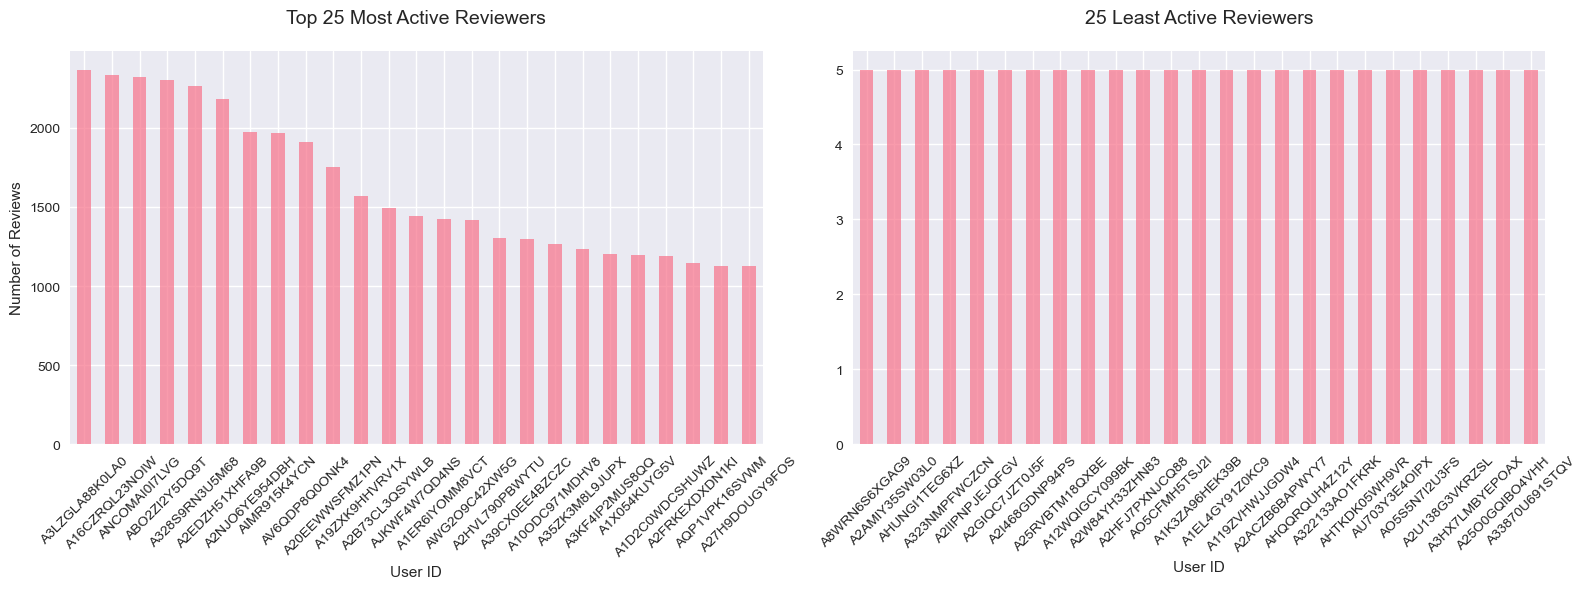


Analyzing Review Helpfulness...


<Figure size 1200x600 with 0 Axes>

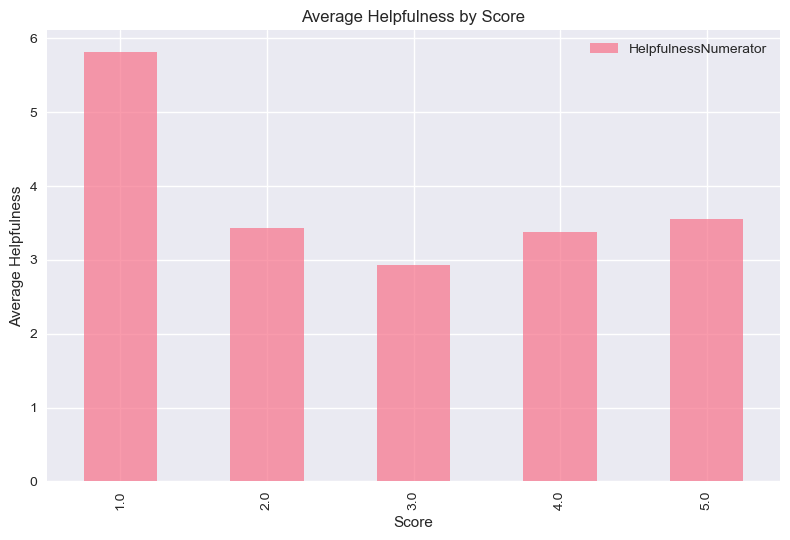


Analyzing Product Ratings...


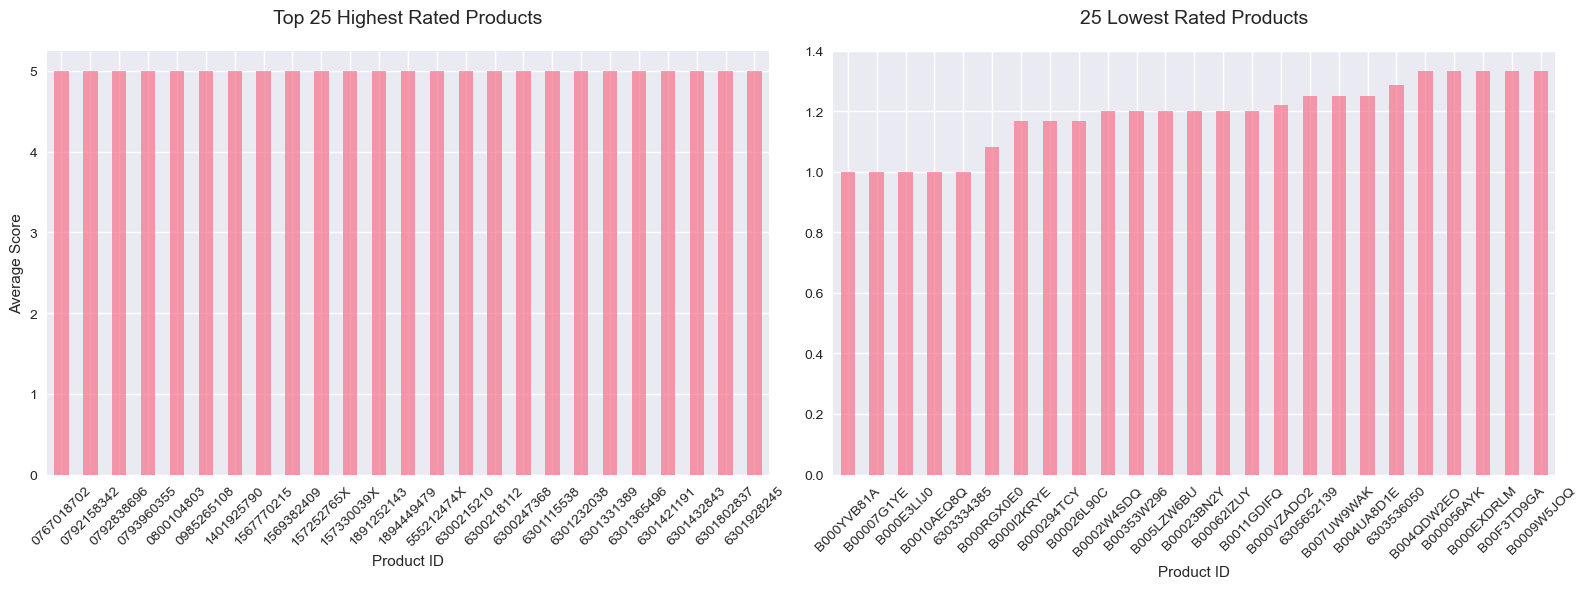


Analyzing Reviewer Behavior...


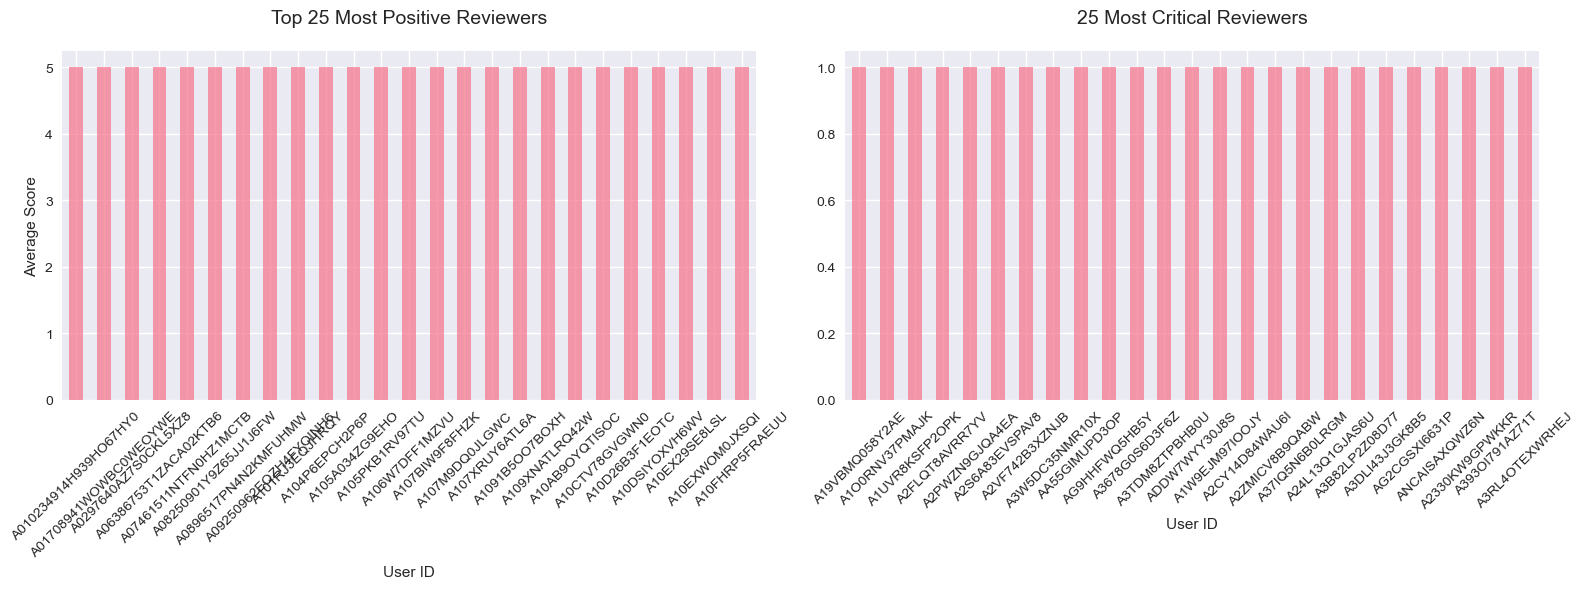


Analyzing Popular Products...


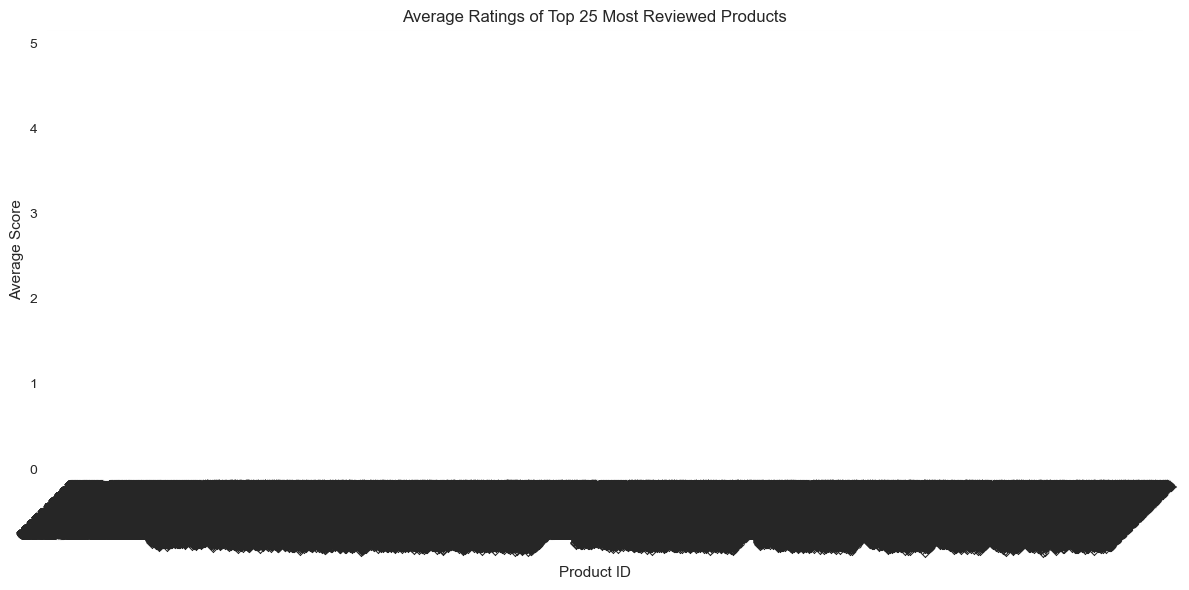

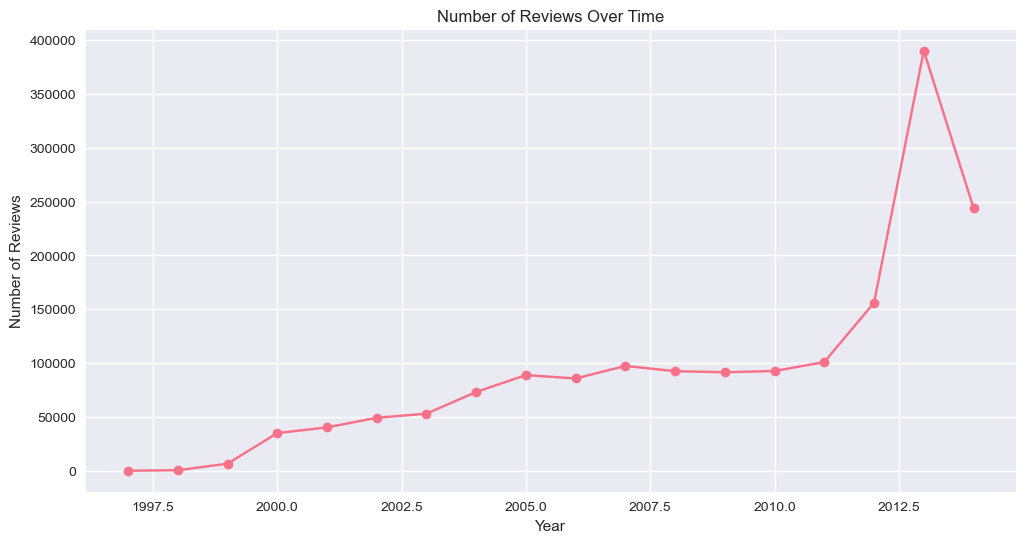

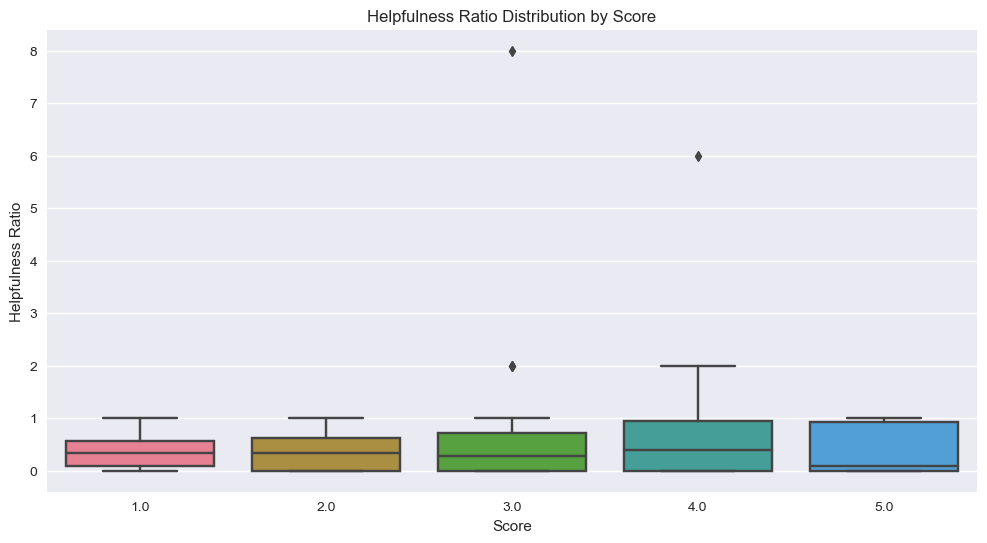


Key Statistics:
Total number of unique products: 50052
Total number of unique users: 123960
Average rating: 4.22
Median rating: 5.0
Most common rating: 5.0
Average helpfulness ratio: 0.40


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Set style for better visualizations
plt.style.use('seaborn')
sns.set_palette("husl")

# Load the datasets with optimized data types
print("Loading datasets...")
dtype = {
    'ProductId': 'category',
    'UserId': 'category',
    'HelpfulnessNumerator': 'float32',
    'HelpfulnessDenominator': 'float32',
    'Score': 'float32'  # Changed to float32 to handle potential NaNs or unexpected decimals
}
trainingSet = pd.read_csv("./data/train.csv", dtype=dtype)
testingSet = pd.read_csv("./data/test.csv", dtype=dtype)

# Handle NaN values directly post-load
trainingSet['HelpfulnessNumerator'].fillna(0, inplace=True)
trainingSet['HelpfulnessDenominator'].fillna(1, inplace=True)
trainingSet['Score'].fillna(trainingSet['Score'].mode()[0], inplace=True)  # Fill with most common rating

# Basic information about datasets
print("train.csv shape is ", trainingSet.shape)
print("test.csv shape is ", testingSet.shape)
print("\nTraining Set Head:")
print(trainingSet.head())
print("\nTesting Set Head:")
print(testingSet.head())
print("\nTraining Set Description:")
print(trainingSet.describe())

# Helper function to create dual bar plots for comparison
def create_dual_bar_plot(data1, data2, title1, title2, xlabel, ylabel, rotation=45):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    data1.plot(kind='bar', alpha=0.7, ax=axes[0])
    axes[0].set_title(title1, pad=20, size=14)
    axes[0].set_xlabel(xlabel)
    axes[0].set_ylabel(ylabel)
    axes[0].tick_params(axis='x', rotation=rotation)
    
    data2.plot(kind='bar', alpha=0.7, ax=axes[1])
    axes[1].set_title(title2, pad=20, size=14)
    axes[1].set_xlabel(xlabel)
    axes[1].tick_params(axis='x', rotation=rotation)
    
    plt.tight_layout()
    plt.show()

# 1. Score Distribution
print("\nAnalyzing Score Distribution...")
score_dist = trainingSet['Score'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
score_dist.plot(kind='bar', alpha=0.7)
plt.title("Distribution of Review Scores")
plt.xlabel("Score")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Product and User Analysis
print("\nAnalyzing Product and User Ratings...")

# Most and least rated products
most_rated = trainingSet['ProductId'].value_counts().nlargest(25)
least_rated = trainingSet['ProductId'].value_counts().nsmallest(25)
create_dual_bar_plot(most_rated, least_rated, 
                     "Top 25 Most Reviewed Products", "25 Least Reviewed Products",
                     "Product ID", "Number of Reviews")

# Most and least active reviewers
top_reviewers = trainingSet['UserId'].value_counts().nlargest(25)
bottom_reviewers = trainingSet['UserId'].value_counts().nsmallest(25)
create_dual_bar_plot(top_reviewers, bottom_reviewers, 
                     "Top 25 Most Active Reviewers", "25 Least Active Reviewers",
                     "User ID", "Number of Reviews")

# 3. Helpfulness Analysis
print("\nAnalyzing Review Helpfulness...")
mean_helpfulness = trainingSet[['Score', 'HelpfulnessNumerator']].groupby('Score').mean()
plt.figure(figsize=(12, 6))
mean_helpfulness.plot(kind='bar', alpha=0.7)
plt.title("Average Helpfulness by Score")
plt.xlabel("Score")
plt.ylabel("Average Helpfulness")
plt.tight_layout()
plt.show()

# 4. Product Rating Analysis
print("\nAnalyzing Product Ratings...")
product_ratings = trainingSet.groupby('ProductId')['Score'].agg(['mean', 'count'])
best_products = product_ratings.nlargest(25, 'mean')
worst_products = product_ratings.nsmallest(25, 'mean')

create_dual_bar_plot(best_products['mean'], worst_products['mean'],
                     "Top 25 Highest Rated Products", "25 Lowest Rated Products",
                     "Product ID", "Average Score")

# 5. Reviewer Analysis (Most Positive and Critical Reviewers)
print("\nAnalyzing Reviewer Behavior...")
reviewer_ratings = trainingSet.groupby('UserId')['Score'].mean()
kind_reviewers = reviewer_ratings.nlargest(25)
harsh_reviewers = reviewer_ratings.nsmallest(25)

create_dual_bar_plot(kind_reviewers, harsh_reviewers, 
                     "Top 25 Most Positive Reviewers", "25 Most Critical Reviewers",
                     "User ID", "Average Score")

# 6. Popular Products Analysis
print("\nAnalyzing Popular Products...")
popular_products = trainingSet[trainingSet['ProductId'].isin(most_rated.index)]
popular_products_ratings = popular_products.groupby('ProductId')['Score'].mean()

plt.figure(figsize=(12, 6))
popular_products_ratings.plot(kind='bar', alpha=0.7)
plt.title("Average Ratings of Top 25 Most Reviewed Products")
plt.xlabel("Product ID")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Time Analysis
trainingSet['Time'] = pd.to_datetime(trainingSet['Time'], unit='s')
trainingSet['Year'] = trainingSet['Time'].dt.year
trainingSet['Month'] = trainingSet['Time'].dt.month

plt.figure(figsize=(12, 6))
trainingSet['Year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Number of Reviews Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.grid(True)
plt.show()

# 8. Helpfulness Ratio Analysis
trainingSet['HelpfulnessRatio'] = (trainingSet['HelpfulnessNumerator'] / trainingSet['HelpfulnessDenominator']).fillna(0).astype('float32')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Score', y='HelpfulnessRatio', data=trainingSet)
plt.title("Helpfulness Ratio Distribution by Score")
plt.ylabel("Helpfulness Ratio")
plt.show()

# 9. Summary Statistics
print("\nKey Statistics:")
print(f"Total number of unique products: {trainingSet['ProductId'].nunique()}")
print(f"Total number of unique users: {trainingSet['UserId'].nunique()}")
print(f"Average rating: {trainingSet['Score'].mean():.2f}")
print(f"Median rating: {trainingSet['Score'].median()}")
print(f"Most common rating: {trainingSet['Score'].mode()[0]}")
print(f"Average helpfulness ratio: {trainingSet['HelpfulnessRatio'].mean():.2f}")


# Adding Features

The add_features_to function takes a DataFrame of Amazon reviews and adds these key features. The function essentially transforms raw review data into a set of numerical features that can be used for predicting review scores.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

def add_features_to(df):
    """
    Enhanced features for better score
    """
    df = df.copy()
    
    # 1. Basic Features
    df['Helpfulness'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']
    df['Helpfulness'] = df['Helpfulness'].fillna(0)
    df['HasHelpfulness'] = (df['HelpfulnessDenominator'] > 0).astype(int)
    
    # 2. Time Features
    df['Time'] = pd.to_datetime(df['Time'], unit='s')
    df['Year'] = df['Time'].dt.year
    df['Month'] = df['Time'].dt.month
    df['DayOfWeek'] = df['Time'].dt.dayofweek
    df['IsWeekend'] = (df['DayOfWeek'] >= 5).astype(int)
    df['YearMonth'] = df['Year']*100 + df['Month']
    
    # 3. Enhanced User Statistics
    user_stats = df.groupby('UserId').agg({
        'Score': ['count', 'mean', 'std', 'min', 'max'],
        'Helpfulness': ['mean', 'count'],
        'ProductId': 'nunique'  # number of unique products reviewed
    }).fillna(0)
    
    user_stats.columns = [
        'UserReviewCount',
        'UserMeanScore',
        'UserScoreStd',
        'UserMinScore',
        'UserMaxScore',
        'UserMeanHelpfulness',
        'UserHelpfulCount',
        'UserUniqueProducts'
    ]
    df = df.merge(user_stats, left_on='UserId', right_index=True, how='left')
    
    # 4. Enhanced Product Statistics
    product_stats = df.groupby('ProductId').agg({
        'Score': ['count', 'mean', 'std', 'min', 'max'],
        'Helpfulness': ['mean', 'count'],
        'UserId': 'nunique'  # number of unique users per product
    }).fillna(0)
    
    product_stats.columns = [
        'ProductReviewCount',
        'ProductMeanScore',
        'ProductScoreStd',
        'ProductMinScore',
        'ProductMaxScore',
        'ProductMeanHelpfulness',
        'ProductHelpfulCount',
        'ProductUniqueUsers'
    ]
    df = df.merge(product_stats, left_on='ProductId', right_index=True, how='left')
    
    # 5. Interaction Features
    df['User_Product_Score_Diff'] = abs(df['UserMeanScore'] - df['ProductMeanScore'])
    df['Score_Range_User'] = df['UserMaxScore'] - df['UserMinScore']
    df['Score_Range_Product'] = df['ProductMaxScore'] - df['ProductMinScore']
    df['User_Experience'] = df['UserReviewCount'] * df['UserMeanHelpfulness']
    
    # Drop unnecessary columns
    columns_to_drop = ['Time', 'Summary', 'Text']
    df = df.drop(columns=columns_to_drop)
    
    return df

# Load or create feature files
if exists('./data/X_train.csv'):
    print("Loading existing training features...")
    X_train = pd.read_csv("./data/X_train.csv")
    
if exists('./data/X_submission.csv'):
    print("Loading existing submission features...")
    X_submission = pd.read_csv("./data/X_submission.csv")
    
else:
    print("Generating new features...")
    # Process the DataFrame
    print("Processing training set...")
    train = add_features_to(trainingSet)
    
    print("Processing submission set...")
    # Merge features for submission set
    X_submission = pd.merge(train, testingSet, left_on='Id', right_on='Id')
    X_submission = X_submission.drop(columns=['Score_x'])
    X_submission = X_submission.rename(columns={'Score_y': 'Score'})
    
    # Filter training set where score is not null
    X_train = train[train['Score'].notnull()]
    
    print("Saving features to files...")
    X_submission.to_csv("./data/X_submission.csv", index=False)
    X_train.to_csv("./data/X_train.csv", index=False)

print("\nFeature shapes:")
print(f"Training set: {X_train.shape}")
print(f"Submission set: {X_submission.shape}")

Generating new features...
Processing training set...
Processing submission set...
Saving features to files...

Feature shapes:
Training set: (1697533, 34)
Submission set: (212192, 34)


# Sample + Split into training and testing set

Creating train-test split...
Original data shape: (1697533, 33)
Original score distribution:
5.0    0.592245
4.0    0.197480
3.0    0.103728
1.0    0.053719
2.0    0.052828
Name: Score, dtype: float64

Split sizes:
Training set: (1273149, 33)
Test set: (424384, 33)

Validating split distributions...


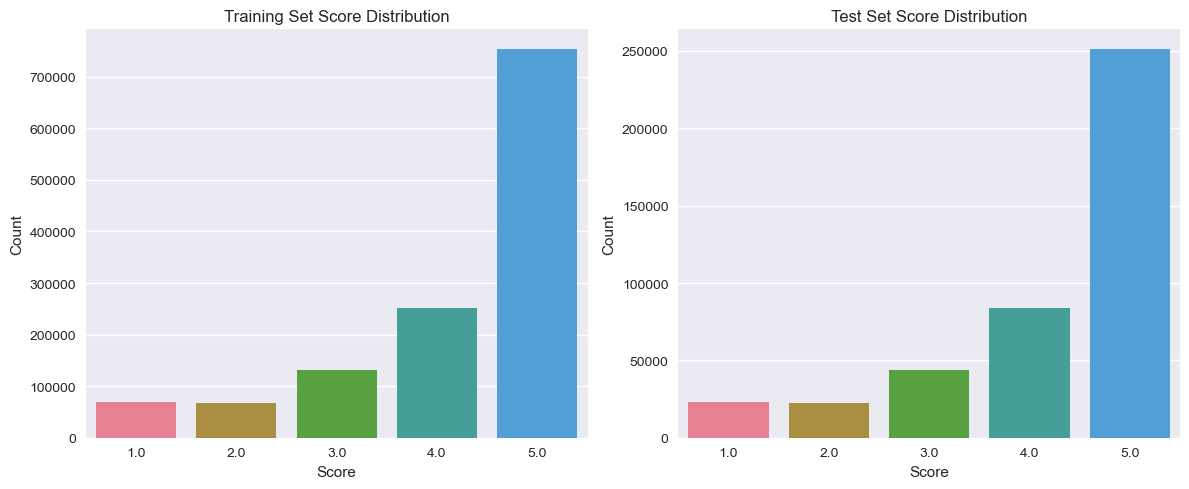


Score distribution comparison:
Training set:
5.0    0.592245
4.0    0.197480
3.0    0.103728
1.0    0.053719
2.0    0.052829
Name: Score, dtype: float64

Test set:
5.0    0.592244
4.0    0.197479
3.0    0.103729
1.0    0.053720
2.0    0.052827
Name: Score, dtype: float64

Checking feature distributions...


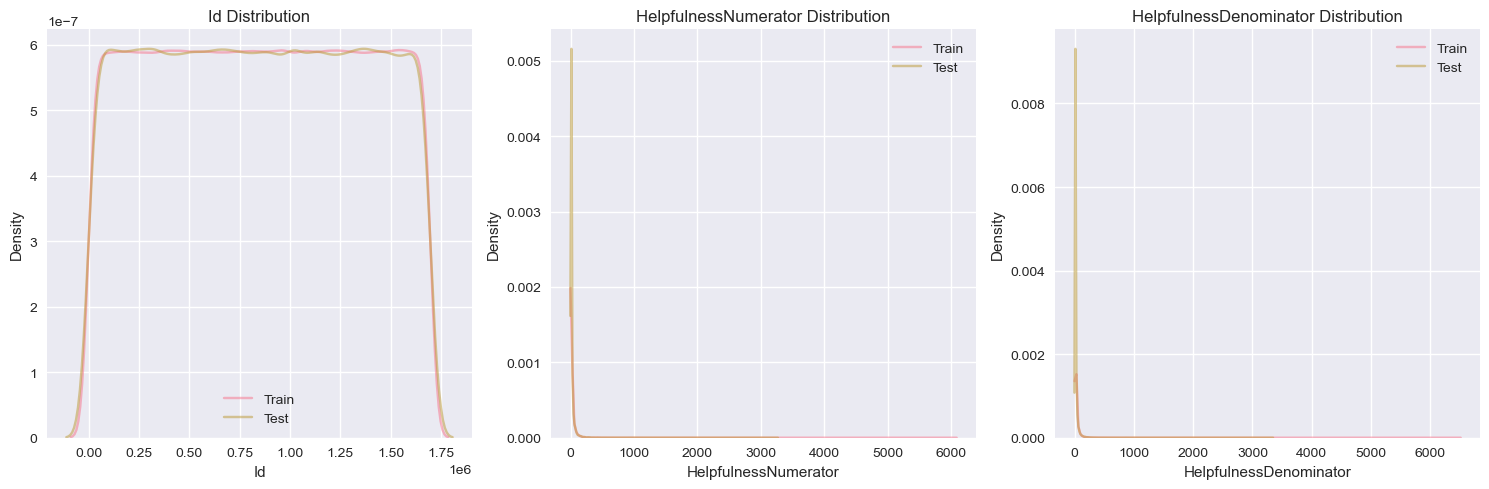


User overlap between train and test: 108677
Product overlap between train and test: 46514

Saving splits to disk...
Saved X_train.csv
Saved X_test.csv
Saved y_train.csv
Saved y_test.csv

Final dataset summary:
Training samples: 1273149
Test samples: 424384
Number of features: 33
Number of classes: 5


In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

def create_train_test_split(X, y, test_size=0.25, random_state=0):
    """
    Create a stratified train-test split and validate the distribution
    """
    print("Original data shape:", X.shape)
    print("Original score distribution:")
    print(y.value_counts(normalize=True))
    
    # Perform stratified split
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=test_size,
        random_state=random_state,
        stratify=y  # Ensure same distribution of scores
    )
    
    print("\nSplit sizes:")
    print(f"Training set: {X_train.shape}")
    print(f"Test set: {X_test.shape}")
    
    # Validate the split
    print("\nValidating split distributions...")
    
    # Score distribution comparison
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.countplot(data=pd.DataFrame({'Score': y_train}), x='Score')
    plt.title('Training Set Score Distribution')
    plt.xlabel('Score')
    plt.ylabel('Count')
    
    plt.subplot(1, 2, 2)
    sns.countplot(data=pd.DataFrame({'Score': y_test}), x='Score')
    plt.title('Test Set Score Distribution')
    plt.xlabel('Score')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()
    
    # Print distribution statistics
    print("\nScore distribution comparison:")
    print("Training set:")
    print(y_train.value_counts(normalize=True))
    print("\nTest set:")
    print(y_test.value_counts(normalize=True))
    
    # Check feature distributions
    print("\nChecking feature distributions...")
    numerical_features = X.select_dtypes(include=[np.number]).columns
    
    plt.figure(figsize=(15, 5))
    for i, feature in enumerate(numerical_features[:3]):  # Show first 3 features as example
        plt.subplot(1, 3, i+1)
        sns.kdeplot(data=X_train[feature], label='Train', alpha=0.5)
        sns.kdeplot(data=X_test[feature], label='Test', alpha=0.5)
        plt.title(f'{feature} Distribution')
        plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Additional validation checks
    def check_data_leakage(X_train, X_test):
        """Check for potential data leakage"""
        if 'UserId' in X_train.columns:
            user_overlap = len(set(X_train['UserId']) & set(X_test['UserId']))
            print(f"\nUser overlap between train and test: {user_overlap}")
        
        if 'ProductId' in X_train.columns:
            product_overlap = len(set(X_train['ProductId']) & set(X_test['ProductId']))
            print(f"Product overlap between train and test: {product_overlap}")
    
    check_data_leakage(X_train, X_test)
    
    return X_train, X_test, y_train, y_test

# Perform the split
print("Creating train-test split...")
X = X_train.drop(columns=['Score'])
y = X_train['Score']

X_train, X_test, y_train, y_test = create_train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=0
)

# Save the splits for later use
print("\nSaving splits to disk...")
splits = {
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'y_test': y_test
}

for name, data in splits.items():
    data.to_csv(f'./data/{name}.csv', index=False)
    print(f"Saved {name}.csv")

# Print final summary
print("\nFinal dataset summary:")
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")
print(f"Number of features: {X_train.shape[1]}")
print(f"Number of classes: {len(y.unique())}")

# Feature Selection

Analyzing feature importance...


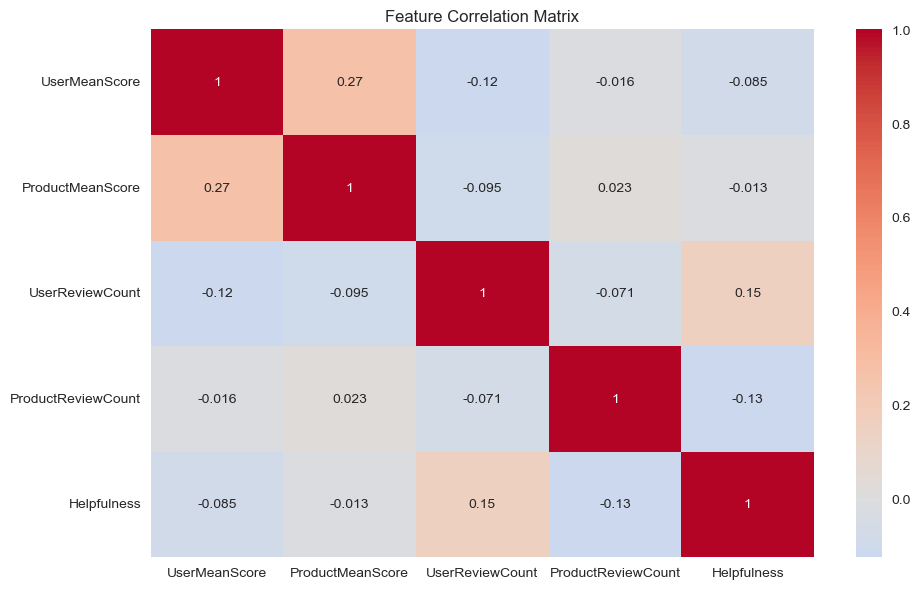

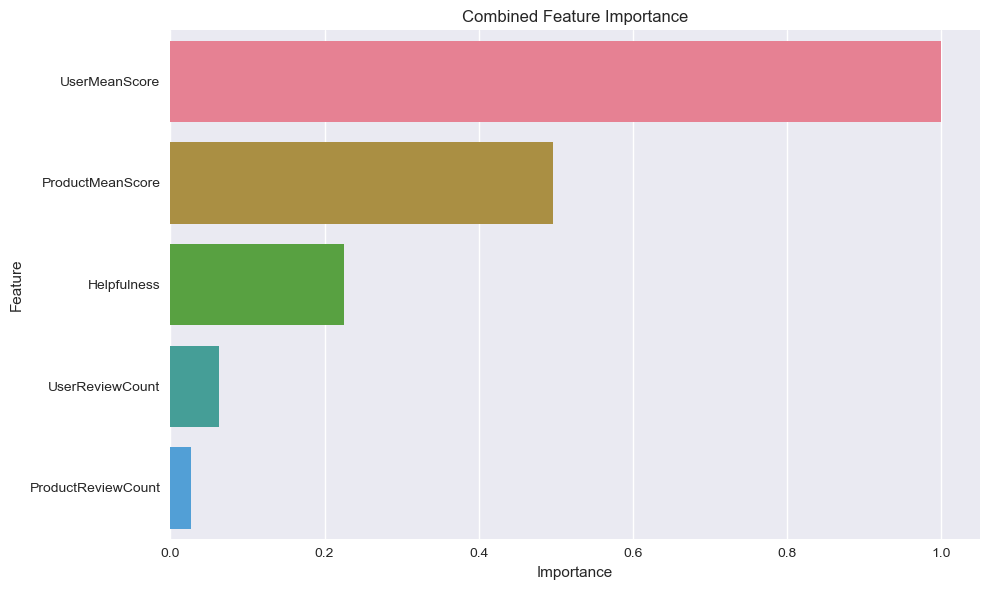


Selected Features:
- UserMeanScore
- ProductMeanScore
- Helpfulness

Final dataset shapes:
Training set: (1273149, 3)
Test set: (424384, 3)
Submission set: (212192, 3)


In [15]:
# Required imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

def analyze_feature_importance(X_train, y_train, features):
    """
    Simplified feature importance analysis using both RF and XGBoost
    """
    print("Analyzing feature importance...")
    
    # Prepare data
    X = X_train[features].fillna(0)
    y = y_train.fillna(0)
    
    # 1. Correlation Analysis
    plt.figure(figsize=(10, 6))
    correlation_matrix = X.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.show()
    
    # 2. Random Forest
    rf = RandomForestClassifier(
        n_estimators=100,
        max_depth=6,
        min_samples_leaf=50,
        random_state=42
    )
    rf.fit(X, y)
    rf_importance = pd.DataFrame({
        'Feature': features,
        'RF_Importance': rf.feature_importances_
    }).sort_values('RF_Importance', ascending=False)
    
    # 3. XGBoost
    dtrain = xgb.DMatrix(X, label=y-1)
    params = {
        'objective': 'multi:softmax',
        'num_class': 5,
        'max_depth': 6,
        'min_child_weight': 5,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'tree_method': 'hist'
    }
    xgb_model = xgb.train(params, dtrain, num_boost_round=100)
    
    # Get combined importance
    rf_scores = rf_importance.set_index('Feature')['RF_Importance']
    xgb_scores = pd.Series(xgb_model.get_score(importance_type='gain'))
    
    # Normalize scores
    rf_scores = rf_scores / rf_scores.max()
    xgb_scores = xgb_scores / xgb_scores.max()
    
    # Average importance
    mean_importance = pd.DataFrame({
        'Feature': features,
        'Importance': [(rf_scores.get(f, 0) + xgb_scores.get(f, 0))/2 for f in features]
    }).sort_values('Importance', ascending=False)
    
    # Plot importance
    plt.figure(figsize=(10, 6))
    sns.barplot(data=mean_importance, x='Importance', y='Feature')
    plt.title('Combined Feature Importance')
    plt.tight_layout()
    plt.show()
    
    return mean_importance

# Initial features
initial_features = [
    'UserMeanScore',
    'ProductMeanScore',
    'UserReviewCount',
    'ProductReviewCount',
    'Helpfulness'
]

# Get feature importance
importance_df = analyze_feature_importance(X_train, y_train, initial_features)

# Select top features (keeping 3 most important)
selected_features = importance_df.nlargest(3, 'Importance')['Feature'].tolist()

print("\nSelected Features:")
for feature in selected_features:
    print(f"- {feature}")

# Create final feature sets
X_train_select = X_train[selected_features]
X_test_select = X_test[selected_features]
X_submission_select = X_submission[selected_features]

print("\nFinal dataset shapes:")
print(f"Training set: {X_train_select.shape}")
print(f"Test set: {X_test_select.shape}")
print(f"Submission set: {X_submission_select.shape}")

# Parameter Tuning


In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np
import xgboost as xgb
import pandas as pd
import json

print("Starting Parameter Tuning...")

def tune_parameters(X, y, n_splits=5):
    """
    Parameter tuning with cross-validation
    """
    # Define the 4 specific parameter combinations to test
    param_combinations = [
        {
            'max_depth': 9,
            'min_child_weight': 2,
            'subsample': 0.85,
            'colsample_bytree': 0.85,
            'eta': 0.025,
            'gamma': 0.1
        },
        {
            'max_depth': 10,
            'min_child_weight': 3,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'eta': 0.02,
            'gamma': 0.05
        },
        {
            'max_depth': 8,
            'min_child_weight': 2,
            'subsample': 0.85,
            'colsample_bytree': 0.8,
            'eta': 0.03,
            'gamma': 0.08
        },
        {
            'max_depth': 9,
            'min_child_weight': 3,
            'subsample': 0.82,
            'colsample_bytree': 0.82,
            'eta': 0.02,
            'gamma': 0.1
        }
    ]
    
    # Fixed parameters
    fixed_params = {
        'objective': 'multi:softmax',
        'num_class': 5,
        'tree_method': 'hist',
        'eval_metric': ['mlogloss', 'merror']
    }
    
    best_score = 0
    best_params = None
    results = []
    
    print(f"Testing {len(param_combinations)} parameter combinations...")
    
    for i, params in enumerate(param_combinations, 1):
        current_params = {**fixed_params, **params}
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
        scores = []
        
        print(f"\nCombination {i}/{len(param_combinations)}")
        print("Parameters:", params)
        
        for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
            # Split data
            X_train_fold = X.iloc[train_idx]
            y_train_fold = y.iloc[train_idx]
            X_val_fold = X.iloc[val_idx]
            y_val_fold = y.iloc[val_idx]
            
            # Convert to DMatrix
            dtrain = xgb.DMatrix(X_train_fold, label=y_train_fold-1)
            dval = xgb.DMatrix(X_val_fold, label=y_val_fold-1)
            
            # Train
            model = xgb.train(
                current_params,
                dtrain,
                num_boost_round=1000,
                evals=[(dval, 'eval')],
                early_stopping_rounds=50,
                verbose_eval=False
            )
            
            # Evaluate
            val_preds = model.predict(dval)
            fold_score = accuracy_score(y_val_fold, val_preds+1)
            scores.append(fold_score)
        
        mean_score = np.mean(scores)
        std_score = np.std(scores)
        
        print(f"Mean CV Score: {mean_score:.4f} (+/- {std_score*2:.4f})")
        
        # Save result
        results.append({
            'params': params,
            'score_mean': mean_score,
            'score_std': std_score
        })
        
        # Update best parameters
        if mean_score > best_score:
            best_score = mean_score
            best_params = params
            print("New best score!")
    
    # Print and save results
    print("\nParameter Tuning Results:")
    print("Best Parameters:")
    for param, value in best_params.items():
        print(f"{param}: {value}")
    print(f"Best CV Score: {best_score:.4f}")
    
    # Save results to file
    results_df = pd.DataFrame(results)
    results_df.to_csv('./data/parameter_tuning_results.csv', index=False)
    
    # Save best parameters
    with open('./data/best_params.json', 'w') as f:
        json.dump(best_params, f)
    
    return best_params, best_score

# Load Y_train if not already loaded
if 'Y_train' not in locals():
    Y_train = pd.read_csv("./data/y_train.csv")['Score']

# Run parameter tuning
best_params, best_score = tune_parameters(X_train_select, Y_train)

print("\nTuning completed!")
print("Results saved to './data/parameter_tuning_results.csv'")
print("Best parameters saved to './data/best_params.json'")

Starting Parameter Tuning...
Testing 4 parameter combinations...

Combination 1/4
Parameters: {'max_depth': 9, 'min_child_weight': 2, 'subsample': 0.85, 'colsample_bytree': 0.85, 'eta': 0.025, 'gamma': 0.1}
Mean CV Score: 0.6201 (+/- 0.0011)
New best score!

Combination 2/4
Parameters: {'max_depth': 10, 'min_child_weight': 3, 'subsample': 0.8, 'colsample_bytree': 0.8, 'eta': 0.02, 'gamma': 0.05}
Mean CV Score: 0.6200 (+/- 0.0011)

Combination 3/4
Parameters: {'max_depth': 8, 'min_child_weight': 2, 'subsample': 0.85, 'colsample_bytree': 0.8, 'eta': 0.03, 'gamma': 0.08}
Mean CV Score: 0.6200 (+/- 0.0014)

Combination 4/4
Parameters: {'max_depth': 9, 'min_child_weight': 3, 'subsample': 0.82, 'colsample_bytree': 0.82, 'eta': 0.02, 'gamma': 0.1}
Mean CV Score: 0.6199 (+/- 0.0013)

Parameter Tuning Results:
Best Parameters:
max_depth: 9
min_child_weight: 2
subsample: 0.85
colsample_bytree: 0.85
eta: 0.025
gamma: 0.1
Best CV Score: 0.6201

Tuning completed!
Results saved to './data/parameter_

# Cross Validation


In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np
import xgboost as xgb
import json

# Load Y_train and best parameters
Y_train = pd.read_csv("./data/y_train.csv")['Score']

# Load best parameters from tuning
with open('./data/best_params.json', 'r') as f:
    best_params = json.load(f)

# Add fixed parameters to best params
final_params = {
    'objective': 'multi:softmax',
    'num_class': 5,
    'tree_method': 'hist',
    'lambda': 1,
    'alpha': 0.1,
    **best_params  # Add tuned parameters
}

def cross_validate_xgb(X, y, params, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []
    feature_importance_list = []
    
    print(f"Starting {n_splits}-fold cross-validation with tuned parameters...")
    print("Parameters being used:", params)
    
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
        print(f"\nFold {fold}/{n_splits}")
        
        X_train_fold = X.iloc[train_idx]
        y_train_fold = y.iloc[train_idx]
        X_val_fold = X.iloc[val_idx]
        y_val_fold = y.iloc[val_idx]
        
        dtrain = xgb.DMatrix(X_train_fold, label=y_train_fold-1)
        dval = xgb.DMatrix(X_val_fold, label=y_val_fold-1)
        
        model = xgb.train(
            params,
            dtrain,
            num_boost_round=300,
            evals=[(dtrain, 'train'), (dval, 'eval')],
            early_stopping_rounds=50,
            verbose_eval=100
        )
        
        val_preds = model.predict(dval)
        val_preds = val_preds + 1
        
        fold_score = accuracy_score(y_val_fold, val_preds)
        scores.append(fold_score)
        
        importance = model.get_score(importance_type='gain')
        feature_importance_list.append(importance)
        
        print(f"Fold {fold} Score: {fold_score:.4f}")
    
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    print(f"\nMean CV Score: {mean_score:.4f} (+/- {std_score*2:.4f})")
    
    # Save cross-validation results
    cv_results = {
        'params': params,
        'scores': scores,
        'mean_score': mean_score,
        'std_score': std_score,
        'feature_importance': feature_importance_list
    }
    
    with open('./data/cv_results.json', 'w') as f:
        json.dump(cv_results, f)
    
    return mean_score, feature_importance_list

# Run cross-validation with tuned parameters
cv_score, feature_importance = cross_validate_xgb(X_train_select, Y_train, final_params)

Starting 5-fold cross-validation with tuned parameters...
Parameters being used: {'objective': 'multi:softmax', 'num_class': 5, 'tree_method': 'hist', 'lambda': 1, 'alpha': 0.1, 'max_depth': 9, 'min_child_weight': 2, 'subsample': 0.85, 'colsample_bytree': 0.85, 'eta': 0.025, 'gamma': 0.1}

Fold 1/5
[0]	train-mlogloss:1.58671	eval-mlogloss:1.58677
[100]	train-mlogloss:0.97133	eval-mlogloss:0.97474
[200]	train-mlogloss:0.91214	eval-mlogloss:0.91835
[299]	train-mlogloss:0.89884	eval-mlogloss:0.90757
Fold 1 Score: 0.6203

Fold 2/5
[0]	train-mlogloss:1.58670	eval-mlogloss:1.58671
[100]	train-mlogloss:0.97131	eval-mlogloss:0.97478
[200]	train-mlogloss:0.91210	eval-mlogloss:0.91846
[299]	train-mlogloss:0.89873	eval-mlogloss:0.90758
Fold 2 Score: 0.6200

Fold 3/5
[0]	train-mlogloss:1.58670	eval-mlogloss:1.58676
[100]	train-mlogloss:0.97125	eval-mlogloss:0.97552
[200]	train-mlogloss:0.91196	eval-mlogloss:0.91930
[299]	train-mlogloss:0.89858	eval-mlogloss:0.90858
Fold 3 Score: 0.6192

Fold 4/5
[

# Model Creation

In [23]:
import os

# Create models directory if it doesn't exist
if not os.path.exists('./models'):
    os.makedirs('./models')
    print("Created './models' directory")

Y_test = pd.read_csv("./data/y_test.csv")['Score']

# Load best parameters and cv results
with open('./data/best_params.json', 'r') as f:
    best_params = json.load(f)

# Add fixed parameters to best params
final_params = {
    'objective': 'multi:softmax',
    'num_class': 5, 
    'tree_method': 'hist',
    'lambda': 1,
    'alpha': 0.1,
    **best_params  # Add tuned parameters
}

print("\nTraining final model with best parameters...")
print("Parameters being used:", final_params)

# Prepare data
dtrain = xgb.DMatrix(X_train_select, label=Y_train-1)
dtest = xgb.DMatrix(X_test_select, label=Y_test-1)

# Train model
model = xgb.train(
    final_params,
    dtrain,
    num_boost_round=400,
    evals=[(dtrain, 'train'), (dtest, 'eval')],
    early_stopping_rounds=50,
    verbose_eval=100
)

# Save model and parameters
model.save_model('./models/amazon_reviews_xgb.model')
with open('./models/final_model_params.json', 'w') as f:
    json.dump(final_params, f)

print("\nModel saved to ./models/amazon_reviews_xgb.model")
print("Parameters saved to ./models/final_model_params.json")

# Get feature importance
importance = model.get_score(importance_type='gain')
importance_df = pd.DataFrame(
    {'Feature': list(importance.keys()), 
     'Importance': list(importance.values())}
).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(importance_df.head(10))

# Save feature importance
importance_df.to_csv('./models/feature_importance.csv', index=False)
print("\nFeature importance saved to ./models/feature_importance.csv")


Training final model with best parameters...
Parameters being used: {'objective': 'multi:softmax', 'num_class': 5, 'tree_method': 'hist', 'lambda': 1, 'alpha': 0.1, 'max_depth': 9, 'min_child_weight': 2, 'subsample': 0.85, 'colsample_bytree': 0.85, 'eta': 0.025, 'gamma': 0.1}
[0]	train-mlogloss:1.58672	eval-mlogloss:1.58675
[100]	train-mlogloss:0.97201	eval-mlogloss:0.97521
[200]	train-mlogloss:0.91327	eval-mlogloss:0.91898
[300]	train-mlogloss:0.90026	eval-mlogloss:0.90818
[399]	train-mlogloss:0.89556	eval-mlogloss:0.90542


c:\Users\arufa\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [16:36:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



Model saved to ./models/amazon_reviews_xgb.model
Parameters saved to ./models/final_model_params.json

Top 10 Most Important Features:
            Feature  Importance
0     UserMeanScore   38.059490
1  ProductMeanScore   17.654907
2       Helpfulness   13.465633

Feature importance saved to ./models/feature_importance.csv


# Model Evaluation

Evaluating model performance...

Model Performance:
Training Accuracy: 0.6240
Testing Accuracy: 0.6199

Detailed Classification Report:
              precision    recall  f1-score   support

         1.0       0.45      0.51      0.48     22798
         2.0       0.26      0.05      0.09     22419
         3.0       0.29      0.15      0.20     44021
         4.0       0.36      0.11      0.17     83807
         5.0       0.68      0.93      0.79    251339

    accuracy                           0.62    424384
   macro avg       0.41      0.35      0.34    424384
weighted avg       0.54      0.62      0.55    424384



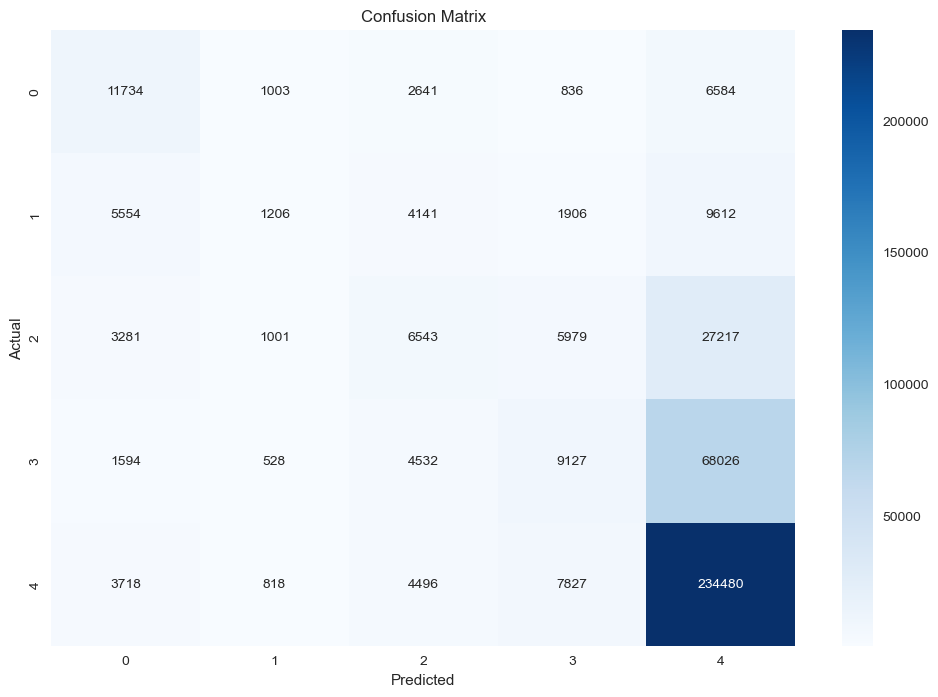

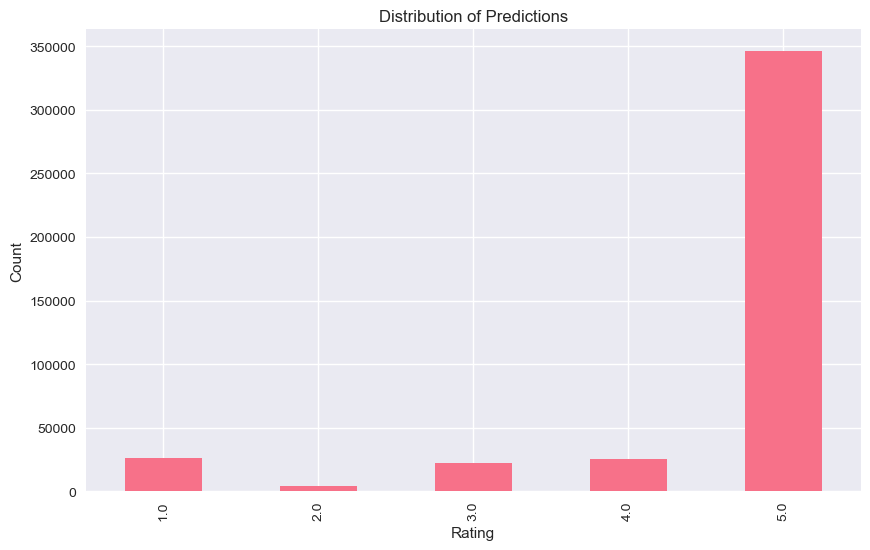

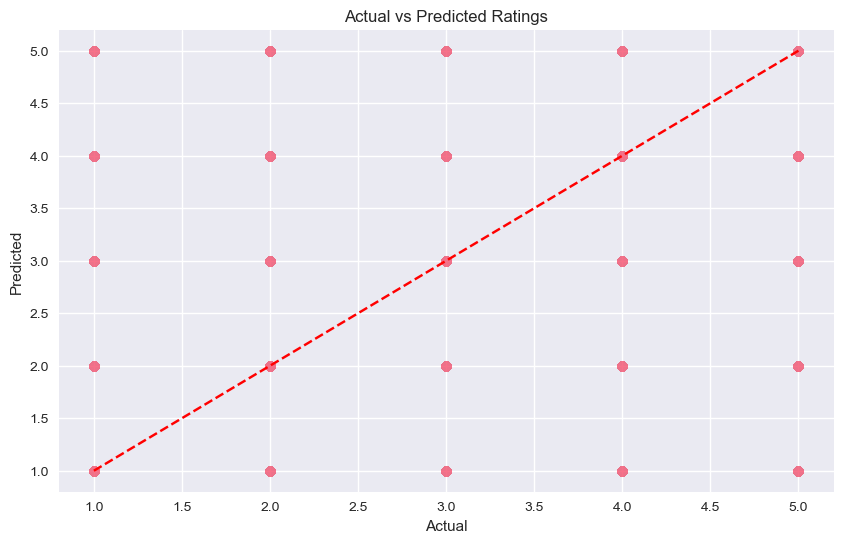

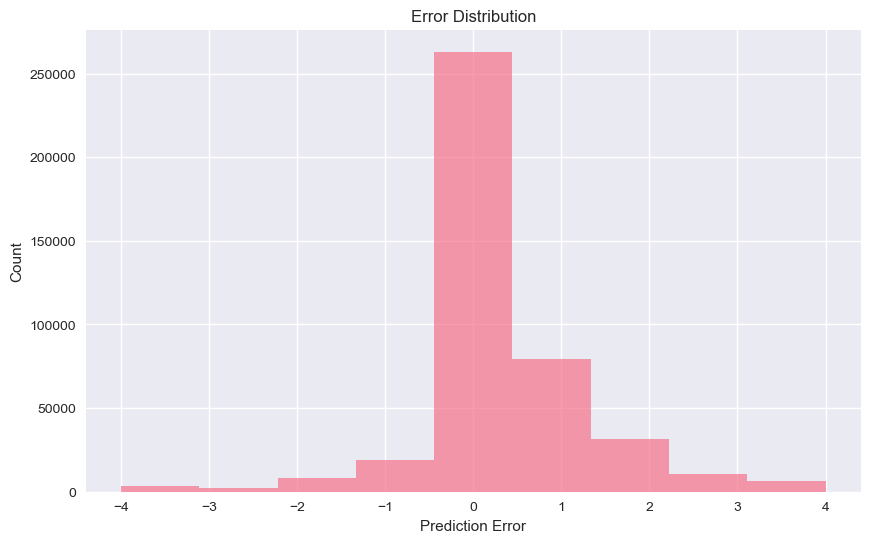


Error Analysis:
Mean Error: 0.3363
Standard Deviation of Error: 1.0755
Mean Absolute Error: 0.6079

All evaluation results saved to ./models/evaluation_results.json
Visualizations saved in ./models/ directory


In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(model, dtrain, dtest, Y_train, Y_test):
   """
   Comprehensive model evaluation
   """
   # Make predictions
   train_preds = model.predict(dtrain) + 1
   test_preds = model.predict(dtest) + 1
   
   # Calculate accuracies
   train_accuracy = accuracy_score(Y_train, train_preds)
   test_accuracy = accuracy_score(Y_test, test_preds)
   
   print("\nModel Performance:")
   print(f"Training Accuracy: {train_accuracy:.4f}")
   print(f"Testing Accuracy: {test_accuracy:.4f}")
   
   # Detailed classification metrics
   print("\nDetailed Classification Report:")
   print(classification_report(Y_test, test_preds))
   
   # Calculate per-class metrics
   precision, recall, f1, support = precision_recall_fscore_support(Y_test, test_preds)
   
   # Plot confusion matrix
   plt.figure(figsize=(12, 8))
   cm = confusion_matrix(Y_test, test_preds)
   sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
   plt.title('Confusion Matrix')
   plt.xlabel('Predicted')
   plt.ylabel('Actual')
   plt.savefig('./models/confusion_matrix.png')
   plt.show()
   
   # Plot prediction distribution
   plt.figure(figsize=(10, 6))
   pd.Series(test_preds).value_counts().sort_index().plot(kind='bar')
   plt.title('Distribution of Predictions')
   plt.xlabel('Rating')
   plt.ylabel('Count')
   plt.savefig('./models/prediction_distribution.png')
   plt.show()
   
   # Plot actual vs predicted
   plt.figure(figsize=(10, 6))
   plt.scatter(Y_test, test_preds, alpha=0.1)
   plt.plot([1, 5], [1, 5], 'r--')
   plt.title('Actual vs Predicted Ratings')
   plt.xlabel('Actual')
   plt.ylabel('Predicted')
   plt.savefig('./models/actual_vs_predicted.png')
   plt.show()
   
   # Calculate error distribution
   errors = test_preds - Y_test
   plt.figure(figsize=(10, 6))
   plt.hist(errors, bins=9, alpha=0.7)
   plt.title('Error Distribution')
   plt.xlabel('Prediction Error')
   plt.ylabel('Count')
   plt.savefig('./models/error_distribution.png')
   plt.show()
   
   # Save evaluation metrics
   evaluation_results = {
       'train_accuracy': train_accuracy,
       'test_accuracy': test_accuracy,
       'confusion_matrix': cm.tolist(),
       'classification_report': classification_report(Y_test, test_preds, output_dict=True),
       'error_stats': {
           'mean_error': float(np.mean(errors)),
           'std_error': float(np.std(errors)),
           'mae': float(np.abs(errors).mean())
       }
   }
   
   # Save results
   with open('./models/evaluation_results.json', 'w') as f:
       json.dump(evaluation_results, f, indent=4)
   
   return evaluation_results

# Run evaluation
print("Evaluating model performance...")
eval_results = evaluate_model(model, dtrain, dtest, Y_train, Y_test)

# Print additional insights
print("\nError Analysis:")
print(f"Mean Error: {eval_results['error_stats']['mean_error']:.4f}")
print(f"Standard Deviation of Error: {eval_results['error_stats']['std_error']:.4f}")
print(f"Mean Absolute Error: {eval_results['error_stats']['mae']:.4f}")

print("\nAll evaluation results saved to ./models/evaluation_results.json")
print("Visualizations saved in ./models/ directory")

# Create submission file

In [25]:
import os
train_accuracy = eval_results['train_accuracy']
test_accuracy = eval_results['test_accuracy']

def create_submission(model, X_submission_select, X_submission, train_accuracy, test_accuracy, version=1):
   """
   Create submission file with accuracy metrics
   """
   print("\nCreating submission file...")
   
   # Prepare submission data
   dsubmission = xgb.DMatrix(X_submission_select)
   
   # Make predictions
   submission_preds = model.predict(dsubmission) + 1
   
   # Create submission DataFrame
   submission = pd.DataFrame({
       'Id': X_submission['Id'],
       'Score': submission_preds
   })
   
   # Validate predictions
   print("\nValidating predictions...")
   print("Checking for missing values:", submission.isnull().sum().sum())
   print("Score range:", submission['Score'].min(), "to", submission['Score'].max())
   
   # Prediction distribution
   print("\nPrediction distribution:")
   dist = submission['Score'].value_counts().sort_index()
   print(dist)
   
   # Save submission with accuracy in filename
   train_acc = f"{train_accuracy:.4f}".replace(".", "")
   test_acc = f"{test_accuracy:.4f}".replace(".", "")
   submission_file = f'./submissions/submission_{version}.csv'
   
   # Create submissions directory if it doesn't exist
   if not os.path.exists('./submissions'):
       os.makedirs('./submissions')
   
   # Save file
   submission.to_csv(submission_file, index=False)
   
   print(f"\nSubmission file created: {submission_file}")
   print(f"Training Accuracy: {train_accuracy:.4f}")
   print(f"Testing Accuracy: {test_accuracy:.4f}")
   print(f"Shape of submission file: {submission.shape}")
   
   return submission

# Create submission with version number and accuracies
version = 1  # Increment this for new submissions
submission = create_submission(
   model, 
   X_submission_select, 
   X_submission, 
   train_accuracy, 
   test_accuracy, 
   version
)


Creating submission file...

Validating predictions...
Checking for missing values: 0
Score range: 1.0 to 5.0

Prediction distribution:
1.0      9859
2.0      1830
3.0      9540
4.0     11521
5.0    179442
Name: Score, dtype: int64

Submission file created: ./submissions/submission_1.csv
Training Accuracy: 0.6240
Testing Accuracy: 0.6199
Shape of submission file: (212192, 2)
